In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv("sales_data.csv")

In [5]:
# Display the first few rows of the dataset
data

,product_id,product_name,category,price,quantity_sold,profit
0,1,T-shirt,Apparel,15.99,120,600
1,2,Jeans,Apparel,39.99,80,800
2,3,Sneakers,Shoes,49.99,50,750
3,4,Backpack,Accessories,29.99,65,450
4,5,Smartphone,Electronics,599.99,15,1500
5,6,Headphones,Electronics,99.99,30,600
6,7,Skirt,Apparel,19.99,90,400
7,8,Watch,Accessories,79.99,40,600
8,9,Running Shoes,Shoes,69.99,55,825
9,10,Tablet,Electronics,299.99,25,500


In [6]:
data['total_sales'] = data['quantity_sold'] * data['price']
data

,product_id,product_name,category,price,quantity_sold,profit,total_sales
0,1,T-shirt,Apparel,15.99,120,600,1918.80
1,2,Jeans,Apparel,39.99,80,800,3199.20
2,3,Sneakers,Shoes,49.99,50,750,2499.50
3,4,Backpack,Accessories,29.99,65,450,1949.35
4,5,Smartphone,Electronics,599.99,15,1500,8999.85
5,6,Headphones,Electronics,99.99,30,600,2999.70
6,7,Skirt,Apparel,19.99,90,400,1799.10
7,8,Watch,Accessories,79.99,40,600,3199.60
8,9,Running Shoes,Shoes,69.99,55,825,3849.45
9,10,Tablet,Electronics,299.99,25,500,7499.75


In [7]:
# Calculate total sales and profit
data['total_profit'] = data['profit'] * data['quantity_sold']
data

,product_id,product_name,category,price,quantity_sold,profit,total_sales,total_profit
0,1,T-shirt,Apparel,15.99,120,600,1918.80,72000
1,2,Jeans,Apparel,39.99,80,800,3199.20,64000
2,3,Sneakers,Shoes,49.99,50,750,2499.50,37500
3,4,Backpack,Accessories,29.99,65,450,1949.35,29250
4,5,Smartphone,Electronics,599.99,15,1500,8999.85,22500
5,6,Headphones,Electronics,99.99,30,600,2999.70,18000
6,7,Skirt,Apparel,19.99,90,400,1799.10,36000
7,8,Watch,Accessories,79.99,40,600,3199.60,24000
8,9,Running Shoes,Shoes,69.99,55,825,3849.45,45375
9,10,Tablet,Electronics,299.99,25,500,7499.75,12500


In [9]:
# Find the most profitable product
most_profitable_product = data.loc[data['total_profit'].idxmax()]
print(most_profitable_product)

product_id             1
product_name     T-shirt
category         Apparel
price              15.99
quantity_sold        120
profit               600
total_sales       1918.8
total_profit       72000
Name: 0, dtype: object


In [10]:
# Group data by category and calculate total sales and profit for each category
category_grouped = data.groupby('category').agg({'total_sales': 'sum', 'total_profit': 'sum'})
category_grouped

,total_sales,total_profit
category,,
Accessories,5148.95,53250
Apparel,6917.10,172000
Electronics,19499.30,53000
Shoes,6348.95,82875


In [14]:
# Filter products with sales quantity above a certain threshold
high_sales_products = data[data['quantity_sold'] > 50]
high_sales_products

,product_id,product_name,category,price,quantity_sold,profit,total_sales,total_profit
0,1,T-shirt,Apparel,15.99,120,600,1918.80,72000
1,2,Jeans,Apparel,39.99,80,800,3199.20,64000
3,4,Backpack,Accessories,29.99,65,450,1949.35,29250
6,7,Skirt,Apparel,19.99,90,400,1799.10,36000
8,9,Running Shoes,Shoes,69.99,55,825,3849.45,45375


In [15]:
# Calculate average price for each category
avg_price_by_category = data.groupby('category')['price'].mean()
avg_price_by_category

category
Accessories     54.990000
Apparel         25.323333
Electronics    333.323333
Shoes           59.990000
Name: price, dtype: float64

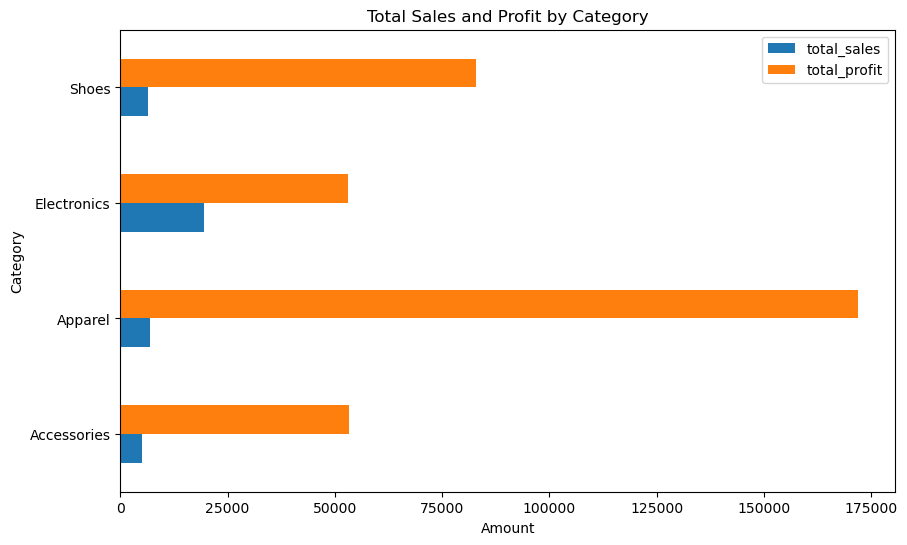

In [17]:
category_grouped.plot(kind='barh', y=['total_sales', 'total_profit'], figsize=(10, 6))
plt.title("Total Sales and Profit by Category")
plt.ylabel("Category")
plt.xlabel("Amount")
plt.show()